# House Price Prediction
This notebook builds a regression model to estimate house prices based on area, bedrooms, and bathrooms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('House_Price_Data.csv')
data.head()

,Area,Bedrooms,Bathrooms,Price
0,1500,3,2,300000
1,1800,4,3,400000
2,2400,3,2,500000
3,3000,5,4,600000
4,3500,4,3,650000


In [3]:
data.describe()

,Area,Bedrooms,Bathrooms,Price
count,5.00000,5.00000,5.00000,5.000000
mean,2440.00000,3.80000,2.80000,490000.000000
std,826.43814,0.83666,0.83666,143178.210633
min,1500.00000,3.00000,2.00000,300000.000000
25%,1800.00000,3.00000,2.00000,400000.000000
50%,2400.00000,4.00000,3.00000,500000.000000
75%,3000.00000,4.00000,3.00000,600000.000000
max,3500.00000,5.00000,4.00000,650000.000000


In [4]:
data.isnull().sum()

Area         0
Bedrooms     0
Bathrooms    0
Price        0
dtype: int64

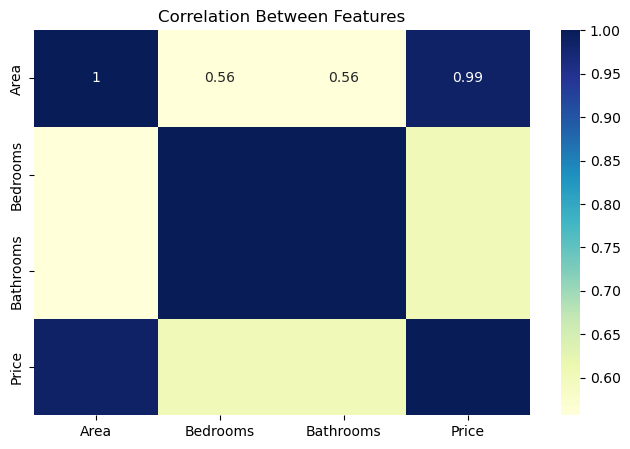

In [5]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Between Features')
plt.show()

In [6]:
X = data[['Area', 'Bedrooms', 'Bathrooms']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 23872.47


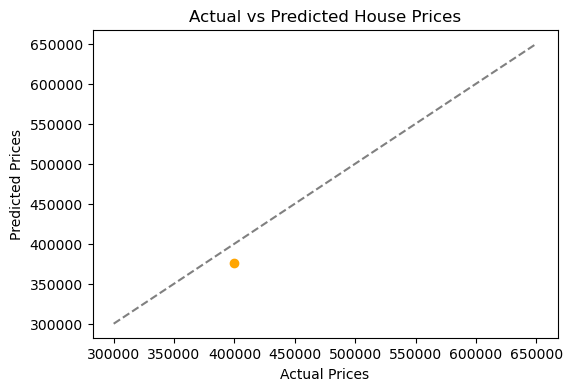

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, predictions, color='orange')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.show()